In [1]:
import numpy as np
import matplotlib.pyplot as pl
import pandas as pd

from fair import FAIR
from fair.io import read_properties
from fair.interface import fill, initialise
from fair.earth_params import seconds_per_year # Don't really neeed this

Makes a FaIR object and the methane life time method. Version 2 uses the version from Nick Leaches paper.

By default this is the one that is used but you can specify it if you put 'leach2021' in here.

By using 'thornhill2021' we are using the version with interactive methane lifetime. 

In [2]:
f = FAIR(ch4_method='thornhill2021')

In [3]:
help(f.define_time)

Help on method define_time in module fair.fair:

define_time(start, end, step) method of fair.fair.FAIR instance
    Define timebounds vector to run FaIR.

    Parameters
    ----------
    start : float
        first timebound of the model (year)
    end : float
        last timebound of the model (year)
    step : float
        timestep (year)



In [4]:
f.define_time(1750, 2500, 1)

In [5]:
# Define SSP scenarios
scenarios = ['ssp119', 'ssp126', 'ssp245', 'ssp370', 'ssp460', 'ssp534-over', 'ssp585']

f.define_scenarios(scenarios)

print (f.scenarios)

['ssp119', 'ssp126', 'ssp245', 'ssp370', 'ssp460', 'ssp534-over', 'ssp585']


In [6]:
df = pd.read_csv("../data_inputs/4xCO2_cummins_ebm3.csv")
models = df['model'].unique()
configs = []

for imodel, model in enumerate(models):
    for run in df.loc[df['model']==model, 'run']:
        configs.append(f"{model}_{run}")
f.define_configs(configs)

In [7]:
f.configs

['CAMS-CSM1-0_r1i1p1f1',
 'GISS-E2-2-G_r1i1p1f1',
 'NorESM2-LM_r1i1p1f1',
 'ACCESS-ESM1-5_r1i1p1f1',
 'HadGEM3-GC31-LL_r1i1p1f3',
 'CESM2_r1i1p1f1',
 'NorCPM1_r1i1p1f1',
 'CIESM_r1i1p1f1',
 'INM-CM4-8_r1i1p1f1',
 'CNRM-CM6-1-HR_r1i1p1f2',
 'CESM2-WACCM_r1i1p1f1',
 'CAS-ESM2-0_r1i1p1f1',
 'EC-Earth3-Veg_r1i1p1f1',
 'MPI-ESM1-2-HR_r1i1p1f1',
 'MPI-ESM1-2-LR_r1i1p1f1',
 'GISS-E2-1-G_r102i1p1f1',
 'GISS-E2-1-G_r1i1p1f1',
 'GISS-E2-1-G_r1i1p3f1',
 'GISS-E2-1-G_r1i1p5f1',
 'CNRM-CM6-1_r1i1p1f2',
 'GISS-E2-1-H_r1i1p1f1',
 'GISS-E2-1-H_r1i1p3f1',
 'CMCC-CM2-SR5_r1i1p1f1',
 'MRI-ESM2-0_r1i1p1f1',
 'MRI-ESM2-0_r4i1p1f1',
 'MRI-ESM2-0_r7i1p1f1',
 'MRI-ESM2-0_r13i1p1f1',
 'MRI-ESM2-0_r10i1p1f1',
 'MRI-ESM2-0_r1i2p1f1',
 'SAM0-UNICON_r1i1p1f1',
 'EC-Earth3_r3i1p1f1',
 'EC-Earth3_r8i1p1f1',
 'IPSL-CM6A-LR_r1i1p1f1',
 'CESM2-FV2_r1i1p1f1',
 'BCC-CSM2-MR_r1i1p1f1',
 'ACCESS-CM2_r1i1p1f1',
 'MIROC6_r1i1p1f1',
 'FIO-ESM-2-0_r1i1p1f1',
 'FIO-ESM-2-0_r2i1p1f1',
 'FIO-ESM-2-0_r3i1p1f1',
 'CESM2-WACCM-FV2_r

Read_properties is imported at the beginning, takes list of default species and properties including GHGs, shortlived forcing and anything you want to calculate and anything you want to calculate a forcing for (so any of the 40 species and things like aerosol cloud forcing).

In [8]:
species, properties = read_properties()
#species = list(properties.keys())

In [9]:
f.define_species(species, properties)

In [10]:
species

['CO2 FFI',
 'CO2 AFOLU',
 'CO2',
 'CH4',
 'N2O',
 'Sulfur',
 'BC',
 'OC',
 'NH3',
 'NOx',
 'VOC',
 'CO',
 'CFC-11',
 'CFC-12',
 'CFC-113',
 'CFC-114',
 'CFC-115',
 'HCFC-22',
 'HCFC-141b',
 'HCFC-142b',
 'CCl4',
 'CHCl3',
 'CH2Cl2',
 'CH3Cl',
 'CH3CCl3',
 'CH3Br',
 'Halon-1202',
 'Halon-1211',
 'Halon-1301',
 'Halon-2402',
 'CF4',
 'C2F6',
 'C3F8',
 'c-C4F8',
 'C4F10',
 'C5F12',
 'C6F14',
 'C7F16',
 'C8F18',
 'NF3',
 'SF6',
 'SO2F2',
 'HFC-125',
 'HFC-134a',
 'HFC-143a',
 'HFC-152a',
 'HFC-227ea',
 'HFC-23',
 'HFC-236fa',
 'HFC-245fa',
 'HFC-32',
 'HFC-365mfc',
 'HFC-4310mee',
 'NOx aviation',
 'Solar',
 'Volcanic',
 'Aerosol-radiation interactions',
 'Aerosol-cloud interactions',
 'Ozone',
 'Contrails',
 'Light absorbing particles on snow and ice',
 'Stratospheric water vapour',
 'Land use',
 'Equivalent effective stratospheric chlorine']

You can modify the input_mode to be concentrations if you don't have all the gases as emissions. 
You have to have both fossil emissions and AFOLU emissions to run in emissions mode. 

In [11]:
properties

{'CO2 FFI': {'type': 'co2 ffi',
  'input_mode': 'emissions',
  'greenhouse_gas': False,
  'aerosol_chemistry_from_emissions': False,
  'aerosol_chemistry_from_concentration': False},
 'CO2 AFOLU': {'type': 'co2 afolu',
  'input_mode': 'emissions',
  'greenhouse_gas': False,
  'aerosol_chemistry_from_emissions': False,
  'aerosol_chemistry_from_concentration': False},
 'CO2': {'type': 'co2',
  'input_mode': 'calculated',
  'greenhouse_gas': True,
  'aerosol_chemistry_from_emissions': False,
  'aerosol_chemistry_from_concentration': False},
 'CH4': {'type': 'ch4',
  'input_mode': 'emissions',
  'greenhouse_gas': True,
  'aerosol_chemistry_from_emissions': False,
  'aerosol_chemistry_from_concentration': True},
 'N2O': {'type': 'n2o',
  'input_mode': 'emissions',
  'greenhouse_gas': True,
  'aerosol_chemistry_from_emissions': False,
  'aerosol_chemistry_from_concentration': True},
 'Sulfur': {'type': 'sulfur',
  'input_mode': 'emissions',
  'greenhouse_gas': False,
  'aerosol_chemistry_fr

The following creates xarrays that you need. so f.emissions will return the empty arrays prepared for running FaIR. 

In [12]:
f.allocate()

In [13]:
f.emissions

<xarray.DataArray (timepoints: 750, scenario: 7, config: 66, specie: 64)> Size: 177MB
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
...
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]])
Coordinates:
  * timepoints  (timepoints) float64 6kB 1.75e+03 1.752e+03 ... 2.5e+03
  * scenario    (scenario) <U11 308B 'ssp119' 'ssp126' ... 'ssp585'
  * config      (config) <U24 6kB 'CAMS-CSM1-0_r1i1p1f1' ... 'MIROC-ES2L_r1i1...
  * specie      (specie) <U43 11kB 'CO2 FFI' ... 'Equivalent effective strato...

Fills in the species with defaults

In [14]:
f.fill_species_configs()

In [15]:
f.species_configs

<xarray.Dataset> Size: 1MB
Dimensions:                                   (config: 66, specie: 64, gasbox: 4)
Coordinates:
  * config                                    (config) <U24 6kB 'CAMS-CSM1-0_...
  * specie                                    (specie) <U43 11kB 'CO2 FFI' .....
  * gasbox                                    (gasbox) int64 32B 0 1 2 3
Data variables: (12/31)
    tropospheric_adjustment                   (config, specie) float64 34kB 0...
    forcing_efficacy                          (config, specie) float64 34kB 1...
    forcing_temperature_feedback              (config, specie) float64 34kB 0...
    forcing_scale                             (config, specie) float64 34kB 1...
    partition_fraction                        (config, specie, gasbox) float64 135kB ...
    unperturbed_lifetime                      (config, specie, gasbox) float64 135kB ...
    ...                                        ...
    aci_shape                                 (config, specie) float64 34kB 0...
    cl_atoms                                  (specie) float64 512B nan ... nan
    br_atoms                                  (specie) float64 512B nan ... nan
    fractional_release                        (config, specie) float64 34kB n...
    ch4_lifetime_chemical_sensitivity         (config, specie) float64 34kB 0...
    lifetime_temperature_sensitivity          (config) float64 528B -0.0408 ....

This is over riding some of those default values

In [16]:
fill(f.species_configs['unperturbed_lifetime'], 10.8537568, specie='CH4')
fill(f.species_configs['baseline_emissions'], 19.01978312, specie='CH4')
fill(f.species_configs['baseline_emissions'], 0.08602230754, specie='N2O')

In [17]:
df_volcanic = pd.read_csv('../data_inputs/volcanic_ERF_monthly_175001-201912.csv', index_col='year')
df_volcanic[1750:].head()

/var/tmp/ipykernel_21373/141345507.py:2: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  df_volcanic[1750:].head()


,erf
year,
1750.000000,0.246406
1750.083333,0.246408
1750.166667,0.246409
1750.250000,0.246410
1750.333333,0.246411


Read in RCMIP emissions from zenodo stores it in cache and populates the emissions with rcmip data. 

In [18]:
f.fill_from_rcmip()

In [19]:
f.emissions

<xarray.DataArray (timepoints: 750, scenario: 7, config: 66, specie: 64)> Size: 177MB
array([[[[0.00950562, 0.29746461,        nan, ...,        nan,
                 nan,        nan],
         [0.00950562, 0.29746461,        nan, ...,        nan,
                 nan,        nan],
         [0.00950562, 0.29746461,        nan, ...,        nan,
                 nan,        nan],
         ...,
         [0.00950562, 0.29746461,        nan, ...,        nan,
                 nan,        nan],
         [0.00950562, 0.29746461,        nan, ...,        nan,
                 nan,        nan],
         [0.00950562, 0.29746461,        nan, ...,        nan,
                 nan,        nan]],

        [[0.00950562, 0.29746461,        nan, ...,        nan,
                 nan,        nan],
         [0.00950562, 0.29746461,        nan, ...,        nan,
                 nan,        nan],
         [0.00950562, 0.29746461,        nan, ...,        nan,
                 nan,        nan],
...
         [0.        , 0.        ,        nan, ...,        nan,
                 nan,        nan],
         [0.        , 0.        ,        nan, ...,        nan,
                 nan,        nan],
         [0.        , 0.        ,        nan, ...,        nan,
                 nan,        nan]],

        [[0.        , 0.        ,        nan, ...,        nan,
                 nan,        nan],
         [0.        , 0.        ,        nan, ...,        nan,
                 nan,        nan],
         [0.        , 0.        ,        nan, ...,        nan,
                 nan,        nan],
         ...,
         [0.        , 0.        ,        nan, ...,        nan,
                 nan,        nan],
         [0.        , 0.        ,        nan, ...,        nan,
                 nan,        nan],
         [0.        , 0.        ,        nan, ...,        nan,
                 nan,        nan]]]])
Coordinates:
  * timepoints  (timepoints) float64 6kB 1.75e+03 1.752e+03 ... 2.5e+03
  * scenario    (scenario) <U11 308B 'ssp119' 'ssp126' ... 'ssp585'
  * config      (config) <U24 6kB 'CAMS-CSM1-0_r1i1p1f1' ... 'MIROC-ES2L_r1i1...
  * specie      (specie) <U43 11kB 'CO2 FFI' ... 'Equivalent effective strato...

In [20]:
volcanic_forcing = np.zeros(751)
volcanic_forcing[:271] = df_volcanic[1749:].groupby(np.ceil(df_volcanic[1749:].index) // 1).mean().squeeze().values
fill(f.forcing, volcanic_forcing[:, None, None], specie="Volcanic")  # sometimes need to expand the array

/var/tmp/ipykernel_21373/2822198715.py:2: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  volcanic_forcing[:271] = df_volcanic[1749:].groupby(np.ceil(df_volcanic[1749:].index) // 1).mean().squeeze().values


These are the initial conditions.

In [21]:
initialise(f.concentration, f.species_configs['baseline_concentration'])
initialise(f.forcing, 0)
initialise(f.temperature, 0)
initialise(f.cumulative_emissions, 0)
initialise(f.airborne_emissions, 0)

In [22]:
df

,model,run,conv,nit,gamma,C1,C2,C3,kappa1,kappa2,kappa3,epsilon,sigma_eta,sigma_xi,F_4xCO2
0,CAMS-CSM1-0,r1i1p1f1,True,4809,28.239872,2.632439,9.262195,52.927697,1.876254,5.153591,0.643546,1.285458,2.690512,0.439493,8.870602
1,GISS-E2-2-G,r1i1p1f1,True,3965,2.385368,3.601142,11.333337,313.520678,1.972359,1.922481,0.631276,0.443575,0.544189,0.535407,8.035197
2,NorESM2-LM,r1i1p1f1,True,1966,1.633858,4.487727,125.070697,0.041775,1.603670,0.823165,1.596259,0.836880,1.343506,0.698845,7.845990
3,ACCESS-ESM1-5,r1i1p1f1,True,3517,2.742392,3.767727,8.922353,87.066320,0.699550,3.583351,0.842623,1.557784,0.636709,0.604740,6.557606
4,HadGEM3-GC31-LL,r1i1p1f3,True,5953,3.129576,3.868931,9.254582,66.399919,0.611179,2.851391,0.642237,1.174268,0.457505,0.611576,7.222087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,TaiESM1,r1i1p1f1,True,6231,2.044911,5.064045,8.999461,91.069184,0.873504,2.314369,0.919607,1.233673,0.461613,0.687217,8.150058
62,NorESM2-MM,r1i1p1f1,True,2562,1.480571,4.121854,121.675907,0.049259,1.961781,0.788035,2.112814,0.528932,1.310908,0.661117,9.113671
63,HadGEM3-GC31-MM,r1i1p1f3,True,4790,3.131744,3.396641,14.143754,64.570893,0.646049,2.007478,0.693694,1.041912,0.497626,0.433937,7.159394
64,NESM3,r1i1p1f1,True,4634,2.798083,2.492649,19.210731,125.556294,0.964647,1.051545,0.478707,0.724899,0.546573,0.272723,8.151686


We can define natural variability using stochastic_run if we want! We do this by using the code in the box below this next one.

Usually we don't use CMIP, here we do but normally we will sample from a calibrated distribution (Watch this space - Chris is onto it!) 

In [23]:
f.climate_configs

<xarray.Dataset> Size: 13kB
Dimensions:                (config: 66, layer: 3)
Coordinates:
  * config                 (config) <U24 6kB 'CAMS-CSM1-0_r1i1p1f1' ... 'MIRO...
  * layer                  (layer) int64 24B 0 1 2
Data variables:
    ocean_heat_transfer    (config, layer) float64 2kB nan nan nan ... nan nan
    ocean_heat_capacity    (config, layer) float64 2kB nan nan nan ... nan nan
    deep_ocean_efficacy    (config) float64 528B nan nan nan nan ... nan nan nan
    stochastic_run         (config) bool 66B False False False ... False False
    sigma_eta              (config) float64 528B 0.5 0.5 0.5 0.5 ... 0.5 0.5 0.5
    sigma_xi               (config) float64 528B 0.5 0.5 0.5 0.5 ... 0.5 0.5 0.5
    gamma_autocorrelation  (config) float64 528B 2.0 2.0 2.0 2.0 ... 2.0 2.0 2.0
    seed                   (config) uint32 264B 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0
    use_seed               (config) bool 66B False False False ... False False
    forcing_4co2           (config) float64 528B 8.0 8.0 8.0 8.0 ... 8.0 8.0 8.0

In [24]:
seed = 1355763

for config in configs:
    model, run = config.split('_')
    condition = (df['model']==model) & (df['run']==run)
    fill(f.climate_configs['ocean_heat_capacity'], df.loc[condition, 'C1':'C3'].values.squeeze(), config=config)
    fill(f.climate_configs['ocean_heat_transfer'], df.loc[condition, 'kappa1':'kappa3'].values.squeeze(), config=config)
    fill(f.climate_configs['deep_ocean_efficacy'], df.loc[condition, 'epsilon'].values[0], config=config)
    fill(f.climate_configs['gamma_autocorrelation'], df.loc[condition, 'gamma'].values[0], config=config)
    fill(f.climate_configs['sigma_eta'], df.loc[condition, 'sigma_eta'].values[0], config=config)
    fill(f.climate_configs['sigma_xi'], df.loc[condition, 'sigma_xi'].values[0], config=config)
    fill(f.climate_configs['stochastic_run'], True, config=config)
    fill(f.climate_configs['use_seed'], True, config=config)
    fill(f.climate_configs['seed'], seed, config=config)

    seed = seed + 399

In [25]:
f.run()

Running 462 projections in parallel:   0%|          | 0/750 [00:00<?, ?timesteps/s]

Text(0, 0.5, 'Temperature anomaly (K)')

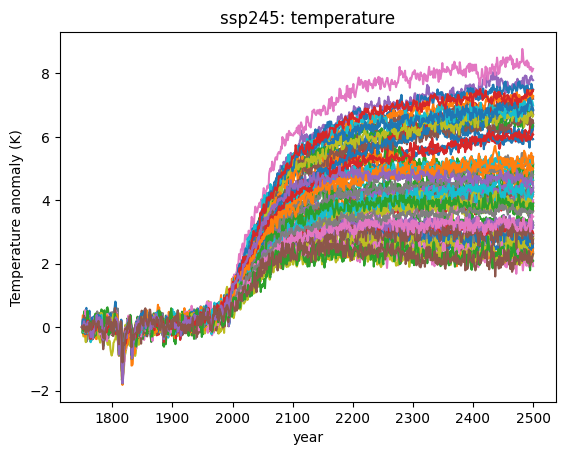

In [26]:
pl.plot(f.timebounds, f.temperature.loc[dict(scenario='ssp245', layer=0)], label=f.configs);
pl.title('ssp245: temperature')
pl.xlabel('year')
pl.ylabel('Temperature anomaly (K)')

/var/tmp/ipykernel_21373/1155360236.py:1: MatplotlibDeprecationWarning: Passing label as a length 66 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  pl.plot(f.timebounds, f.temperature.loc[dict(scenario='ssp245', config='UKESM1-0-LL_r1i1p1f2', layer=0)], label=f.configs);
/var/tmp/ipykernel_21373/1155360236.py:2: MatplotlibDeprecationWarning: Passing label as a length 66 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  pl.plot(f.timebounds, f.temperature.loc[dict(scenario='ssp245', config='NorESM2-LM_r1i1p1f1', layer=0)], label=f.configs);


Text(0, 0.5, 'Temperature anomaly (K)')

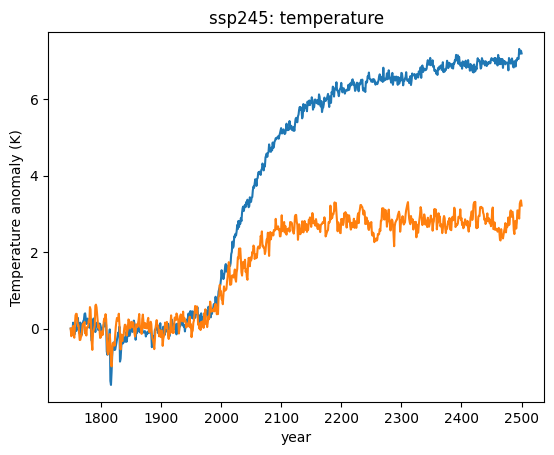

In [27]:
pl.plot(f.timebounds, f.temperature.loc[dict(scenario='ssp245', config='UKESM1-0-LL_r1i1p1f2', layer=0)], label=f.configs);
pl.plot(f.timebounds, f.temperature.loc[dict(scenario='ssp245', config='NorESM2-LM_r1i1p1f1', layer=0)], label=f.configs);
pl.title('ssp245: temperature')

pl.xlabel('year')
pl.ylabel('Temperature anomaly (K)')

Text(0, 0.5, 'methane lifetime (yr)')

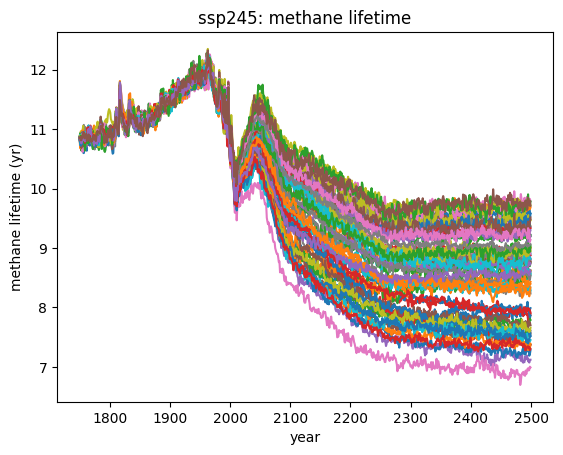

In [28]:
pl.plot(f.timebounds, f.species_configs['unperturbed_lifetime'].loc[dict(specie='CH4', gasbox=0)].data * f.alpha_lifetime.loc[dict(scenario='ssp245', specie='CH4')], label=f.configs);
pl.title('ssp245: methane lifetime')
pl.xlabel('year')
pl.ylabel('methane lifetime (yr)')

Text(0, 0.5, '[1]')

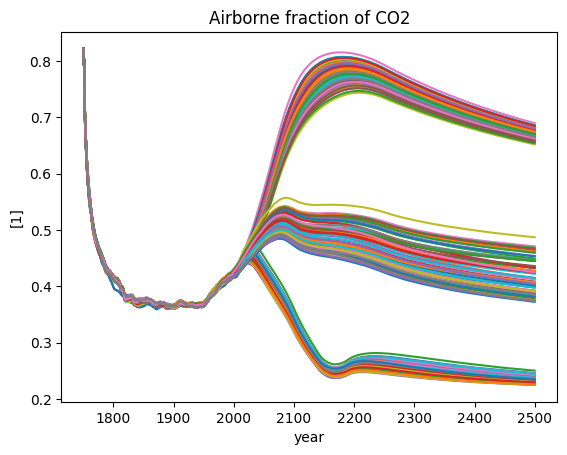

In [29]:
pl.plot(f.timebounds, f.airborne_fraction.loc[dict(scenario='ssp585', specie='CO2')], label=f.configs);
pl.plot(f.timebounds, f.airborne_fraction.loc[dict(scenario='ssp119', specie='CO2')], label=f.configs);
pl.plot(f.timebounds, f.airborne_fraction.loc[dict(scenario='ssp245', specie='CO2')], label=f.configs);

pl.title('Airborne fraction of CO2')
pl.xlabel('year')
pl.ylabel('[1]')

Text(0, 0.5, 'J')

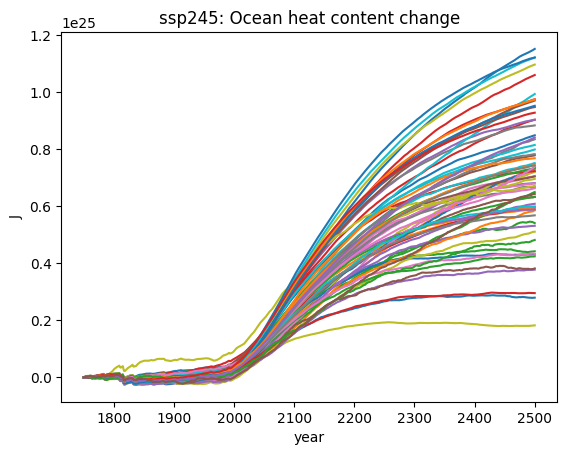

In [30]:
pl.plot(f.timebounds, f.ocean_heat_content_change.loc[dict(scenario='ssp245')], label=f.configs);
pl.title('ssp245: Ocean heat content change')
pl.xlabel('year')
pl.ylabel('J')

In [31]:
dir(f)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_aci_indices',
 '_aerosol_chemistry_from_concentration_indices',
 '_aerosol_chemistry_from_emissions_indices',
 '_ari_indices',
 '_aviation_nox_indices',
 '_bc_indices',
 '_cfc11_indices',
 '_ch4_indices',
 '_ch4_method',
 '_check_properties',
 '_co2_afolu_indices',
 '_co2_ffi_indices',
 '_co2_indices',
 '_contrails_indices',
 '_eesc_indices',
 '_ghg_forward_indices',
 '_ghg_indices',
 '_ghg_inverse_indices',
 '_ghg_method',
 '_h2ostrat_indices',
 '_halogen_indices',
 '_landuse_indices',
 '_lapsi_indices',
 '_make_ebms',
 '_make_indices',
 '_minor_ghg_indices',
 '_n2o_indices',
 '_n_configs',
 '_n_gasbox

Text(0, 0.5, 'GtCO2')

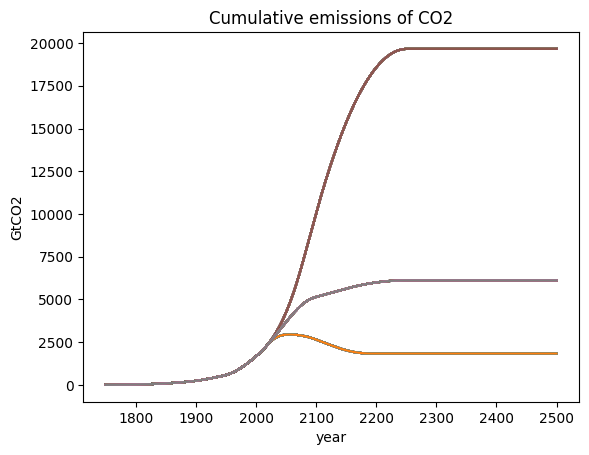

In [32]:
pl.plot(f.timebounds, f.cumulative_emissions.loc[dict(scenario='ssp585', specie='CO2')], label=f.configs);
pl.plot(f.timebounds, f.cumulative_emissions.loc[dict(scenario='ssp119', specie='CO2')], label=f.configs);
pl.plot(f.timebounds, f.cumulative_emissions.loc[dict(scenario='ssp245', specie='CO2')], label=f.configs);


pl.title('Cumulative emissions of CO2')
pl.xlabel('year')
pl.ylabel('GtCO2')

In [33]:
f.emissions.loc[dict(scenario='ssp245', specie='CH4')]

<xarray.DataArray (timepoints: 750, config: 66)> Size: 396kB
array([[ 19.01978312,  19.01978312,  19.01978312, ...,  19.01978312,
         19.01978312,  19.01978312],
       [ 18.91510887,  18.91510887,  18.91510887, ...,  18.91510887,
         18.91510887,  18.91510887],
       [ 18.88971181,  18.88971181,  18.88971181, ...,  18.88971181,
         18.88971181,  18.88971181],
       ...,
       [122.10259461, 122.10259461, 122.10259461, ..., 122.10259461,
        122.10259461, 122.10259461],
       [122.10259461, 122.10259461, 122.10259461, ..., 122.10259461,
        122.10259461, 122.10259461],
       [122.10259461, 122.10259461, 122.10259461, ..., 122.10259461,
        122.10259461, 122.10259461]])
Coordinates:
  * timepoints  (timepoints) float64 6kB 1.75e+03 1.752e+03 ... 2.5e+03
    scenario    <U11 44B 'ssp245'
  * config      (config) <U24 6kB 'CAMS-CSM1-0_r1i1p1f1' ... 'MIROC-ES2L_r1i1...
    specie      <U43 172B 'CH4'

Defining time in emissions you need to remember to go from the midpoint of the year you are interested in, so go 2015.5 to get 2015.

In [34]:
f.emissions.loc[
    dict(
        scenario='ssp245', 
        specie='CH4', 
        timepoints=np.arange(2015.5, 2500.5)
    )
]

<xarray.DataArray (timepoints: 485, config: 66)> Size: 256kB
array([[388.07279566, 388.07279566, 388.07279566, ..., 388.07279566,
        388.07279566, 388.07279566],
       [388.07635106, 388.07635106, 388.07635106, ..., 388.07635106,
        388.07635106, 388.07635106],
       [388.07990646, 388.07990646, 388.07990646, ..., 388.07990646,
        388.07990646, 388.07990646],
       ...,
       [122.10259461, 122.10259461, 122.10259461, ..., 122.10259461,
        122.10259461, 122.10259461],
       [122.10259461, 122.10259461, 122.10259461, ..., 122.10259461,
        122.10259461, 122.10259461],
       [122.10259461, 122.10259461, 122.10259461, ..., 122.10259461,
        122.10259461, 122.10259461]])
Coordinates:
  * timepoints  (timepoints) float64 4kB 2.016e+03 2.016e+03 ... 2.5e+03
    scenario    <U11 44B 'ssp245'
  * config      (config) <U24 6kB 'CAMS-CSM1-0_r1i1p1f1' ... 'MIROC-ES2L_r1i1...
    specie      <U43 172B 'CH4'

In [35]:
f.emissions.loc[
    dict(
        scenario='ssp245', 
        specie='CH4', 
        timepoints=np.arange(2015.5, 2500.5)
    )
]=0.2*f.emissions.loc[
    dict(
        scenario='ssp245', 
        specie='CH4', 
        timepoints=np.arange(2015.5, 2500.5)
    )
]

In [36]:
f.emissions.loc[
    dict(
        scenario='ssp245', 
        specie='CH4', 
        timepoints=np.arange(2015.5, 2500.5)
    )
]

<xarray.DataArray (timepoints: 485, config: 66)> Size: 256kB
array([[77.61455913, 77.61455913, 77.61455913, ..., 77.61455913,
        77.61455913, 77.61455913],
       [77.61527021, 77.61527021, 77.61527021, ..., 77.61527021,
        77.61527021, 77.61527021],
       [77.61598129, 77.61598129, 77.61598129, ..., 77.61598129,
        77.61598129, 77.61598129],
       ...,
       [24.42051892, 24.42051892, 24.42051892, ..., 24.42051892,
        24.42051892, 24.42051892],
       [24.42051892, 24.42051892, 24.42051892, ..., 24.42051892,
        24.42051892, 24.42051892],
       [24.42051892, 24.42051892, 24.42051892, ..., 24.42051892,
        24.42051892, 24.42051892]])
Coordinates:
  * timepoints  (timepoints) float64 4kB 2.016e+03 2.016e+03 ... 2.5e+03
    scenario    <U11 44B 'ssp245'
  * config      (config) <U24 6kB 'CAMS-CSM1-0_r1i1p1f1' ... 'MIROC-ES2L_r1i1...
    specie      <U43 172B 'CH4'

In [37]:
print(f.ocean_heat_content_change.loc[dict(scenario='ssp245', timebounds=np.arange(1750, 2500))])

<xarray.DataArray (timebounds: 750, config: 66)> Size: 396kB
array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.88302283e+21, 4.58648259e+21, 1.01503643e+22, ...,
        4.36287271e+21, 4.76003563e+21, 6.92542855e+21],
       [9.23655250e+21, 6.66361683e+21, 1.72457088e+22, ...,
        9.64334353e+21, 8.23174311e+21, 9.88949569e+21],
       ...,
       [2.79147659e+24, 7.29378122e+24, 5.44131127e+24, ...,
        9.27174582e+24, 8.38144159e+24, 6.41783165e+24],
       [2.79225114e+24, 7.29755070e+24, 5.42997305e+24, ...,
        9.27547367e+24, 8.39186261e+24, 6.42803247e+24],
       [2.79113439e+24, 7.30351129e+24, 5.41791284e+24, ...,
        9.27960711e+24, 8.40133293e+24, 6.43150760e+24]])
Coordinates:
  * timebounds  (timebounds) float64 6kB 1.75e+03 1.751e+03 ... 2.499e+03
    scenario    <U11 44B 'ssp245'
  * config      (config) <U24 6kB 'CAMS-CSM1-0_r1i1p1f1' ... 'MIROC-ES2L_r1i1...


In [39]:
print(f.temperature.loc[dict(scenario='ssp245', timebounds=np.arange(1750, 2500))])

<xarray.DataArray (timebounds: 750, config: 66, layer: 3)> Size: 1MB
array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[-1.26420139e-01, -1.78499168e-02, -6.79133991e-05],
        [ 1.11900703e-02, -1.25324837e-02, -1.36463315e-05],
        [-1.99048328e-01, -5.86617002e-04, -5.52963786e-04],
        ...,
        [ 6.26294356e-02, -3.50528466e-03, -2.23422651e-05],
        [ 1.61191610e-02, -1.03941256e-03, -2.49863993e-06],
        [-5.34854932e-02,  4.18237427e-03,  2.85359604e-06]],

       [[ 1.44029303e-01,  2.70180778e-02, -9.78846652e-05],
        [ 8.05745722e-02, -1.17917859e-02, -3.87183578e-05],
        [-8.78944650e-02, -9.59531042e-04, -9.3

In [ ]:
import os

In [ ]:
f.ocean_heat_content_change.loc[dict(scenario=scenario, timebounds=np.arange(1750, 2501))]

In [ ]:
f.temperature.loc[dict(scenario=scenario, timebounds=np.arange(1750, 2501), layer=0)]

In [ ]:
# Output to csv, first create a dataframe 
model_archive = '../csv_FaIRoutputfiles_ssp/'
print (scenarios)
print 

if os.path.isdir(model_archive):
    print("Item already exists")
else:
    os.mkdir(model_archive)
    print ("Making the model directory")
    
#model_dir = model_archive+scenario+'/'
    
for scenario in scenarios:
    for variable in ['ocean_heat_content_change', 'temperature']:
    
        years = 1750+np.arange(len(f.temperature.loc[dict(scenario=scenario, timebounds=np.arange(1750, 2501))]))
        header_text = np.insert(years, 0, 0)
        if variable == 'ocean_heat_content_change':
            dic = f.ocean_heat_content_change.loc[dict(scenario=scenario, timebounds=np.arange(1750, 2501))]
        else:
            dic = f.temperature.loc[dict(scenario=scenario, timebounds=np.arange(1750, 2501), layer=0)]
        
        SSPs = {'ssp119':'ssp119',
                'ssp126':'ssp126',
                'ssp245':'ssp245',
                'ssp370':'ssp370',
                'ssp534-over':'ssp534_over', 
                'ssp585':'ssp585'
          }
        
        filename='../csv_FaIRoutputfiles_ssp/ssprcmip_'+SSPs[scenario]+'_'+variable+'.csv'
        print(filename)
        pd.DataFrame(dic).T.reset_index().to_csv(filename, header=header_text, index=False)
        